<h2>Underwitting</h2>
<h3>Loan data for all loans issued by XYZ Corp. through 2007-2015.</h3>
<h3>Objective :-</h3>
<h4>You have to build a data model to predict the probability of default, and choose a cut-off based on what you feel is suitable. Alternatively you can also use a modelling technique which gives binary output.</h4>

In [1]:
import pandas as pd
import math
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
from  collections import Counter 
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import KFold
#from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_table(r"C:\Users\kusha\Desktop\data sci\python\pythonProject\XYZCorp_LendingData.text" , index_col = None)

In [3]:
df.shape

(855969, 73)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


<b>Creating Copy of dataframe.</b>

In [5]:
df_copy = pd.DataFrame.copy(df)
pd.set_option('display.max_columns', 80)
df_copy.head(n = 2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


<h3>Before proceeding ahead , lets remove those variables which are not important for modeling or prediction.</h3>

<h4>Variables "id" , "member_id" , "zip_code" , "addr_state" , "last_pymnt_d" , "next_pymnt_d" , "last_credit_pull_d","desc" and "policy_code" should be removed as they are not important for modeling. We wont remove "issue_d" for now cause we will have to use it for spliting our data in train and test .</h4>

In [6]:
remove_list = ["id" , "member_id" , "zip_code" , "addr_state" , "last_pymnt_d" , "next_pymnt_d" , "last_credit_pull_d" 
               , "desc" ,"policy_code"]
for i in remove_list:
    del df_copy[i]

<h4>The on going payment processes should not be considered as these values can mislead the machine to predict wrong values</h4>
<b>As the problem statement states : </b>
<h5>"In this project you will have to put yourself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.
The data should be divided into train ( June 2007 - May 2015 ) and out-of-time test ( June 2015 - Dec 2015 ) data."</h5><br>
<b>"DECIDING WHOM TO GIVE LOAN IN FUTURE"</b><br>
<b>So , variables like<b> <br>
<b>total_pymnt	: Payments received to date for total amount funded</b><br>
<b>total_pymnt_inv :	Payments received to date for portion of total amount funded by investors</b><br>
<b>total_rec_int :	Interest received to date </b><br>
<b>total_rec_late_fee :	Late fees received to date </b><br>
<b>total_rec_prncp	: Principal received to date</b><br>
<b>So whenever a customer comes for loan i wont ask him "How much amount of loan have you cleared yet ?" , how will the customer answer this question , when we have not yet decided whether to give loan or not to the customer.</b><br>
<b>And even this values may mislead the model to predict wrong values cause we have to predict on data of customers who's final loan payment date hasnt even arrived or have taken the loan recently .</b>

In [7]:
remove_list = ["total_pymnt" , "total_pymnt_inv" , "total_rec_int" , "total_rec_late_fee" , "total_rec_prncp"]
for i in remove_list:
    del df_copy[i]

In [8]:
df_copy.shape

(855969, 59)

<h3>Missing Values </h3> 

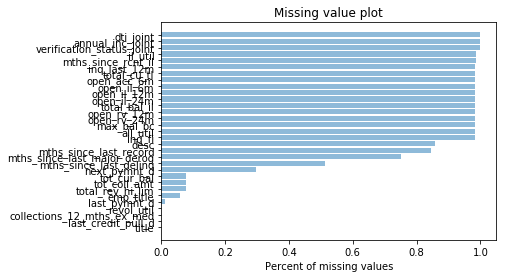

In [9]:
def nulls():
    mvs = pd.DataFrame()
    labels = []
    percent = []
    
    for cols in df.columns.values:
        if df[cols].isnull().sum() > 0:
            p = (df[cols].isnull().sum()/df.shape[0])
            labels.append(cols)
            percent.append(p)
    mvs["labels"] = labels
    mvs["percent"] = percent
    mvs = mvs.sort_values("percent")
    y_pos = np.arange(len(mvs))
    plt.barh(y_pos , mvs["percent"]  , align = "center" , alpha = 0.5)
    plt.yticks(y_pos , mvs["labels"])
    plt.xlabel("Percent of missing values")
    plt.title("Missing value plot") 
    plt.rcParams["figure.figsize"] = (15,5)
    plt.show()
nulls()

<b>1)As we can infer from the plot that many variables have missing values more than 40% of data.</b>
<br>
<b>2)In this case we can remove these variables which have missing values more than 40% .</b>
<h4>Before removing these column we can use dti_joint to combine dti and dti_joint of applicants type joint and replace these calculated dti values of applicants type joint with dti value.</h4>
<b>Cause Applicant type joint means 2 people together have issued loan .</b><br>
<b>So the dept to income(dti) ratio of one individual from applicant type joint is stored in dti and the dti ratio of other individual is saved in dti_joint.</b><br>
<b>If we remove dti_joint because of missing values then we might loose important information.</b><br>
<b>Dept to income ratio is very important feature or variable in underwritting , to predict whether the loan issuer will default or not.</b><br>
<h5>Formula to calculate Dept To Income Ratio :</h5>
<b>Debt to income ratio = Monthly Expenses / Monthly Income </b><br>
<br>
<b> To get joint dti of Applicant joint we will have find Monthly expenses of both the individuals of applicant type joint.</b><br>
<b>We can calculate Monthly Expense by multiplying  dept to income ratio into monthly income<b>

<h4>Another reason to compute this value is because ,the applicant type individual is more than 90% and applicant type joint are only 10% .This is a case of imbalanced independent variable, which can lead the model to perform bad.</h4>
<h3>Check the plot below.</h3>

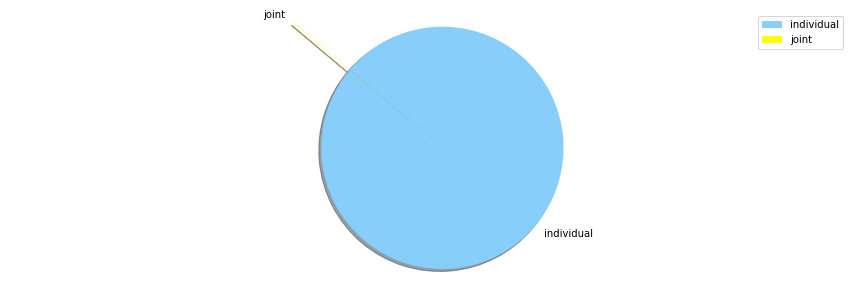

In [10]:
labels = 'individual', 'joint'
sizes = [855527, 442 ]
colors = ['lightskyblue', 'yellow']
explode = (0.10, 0.5)  # explode 1st slice
 
# Plot
patches , text = plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

In [11]:
df["application_type"].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

<b>There are only 442 joint applicants out of 855969 applicants ,which is very less.</b><br>
<b>Therefore creating new dti values for applicant type joint is a better option.</b><br>
<b>Same we can do with annual income and annual income joint.</b><br>

<b>So now lets create a functions to replace the dti ratio and annual income of joint applicant's.<b>

In [12]:
def newDti(df):
    monthly_inc = (df["annual_inc"][df["dti_joint"].isnull() == False]/12)
    monthly_inc_joint = (df["annual_inc_joint"][df["dti_joint"].isnull() == False]/12)
 
    dti_ = (df["dti"][df["dti_joint"].isnull() == False])
    dti_j = (df["dti_joint"][df["dti_joint"].isnull() == False])
    
    monthly_expenses = dti_*monthly_inc
    monthly_expenses_joint = dti_j*monthly_inc_joint
    
    numerator = monthly_expenses + monthly_expenses_joint
    denominator = monthly_inc + monthly_inc_joint    
    
    new_dti = numerator/denominator
    
    ind = df["dti"][df["dti_joint"].isnull() == False].index
    
    df["dti"][ind] = new_dti

def new_annual_inc(df):
    
    combined_inc = df["annual_inc"][df["annual_inc_joint"].isnull() == False] + df["annual_inc_joint"][df["annual_inc_joint"].isnull() ==  False]
    ind = df["annual_inc"][df["annual_inc_joint"].isnull() == False].index
    df["annual_inc"][ind] = combined_inc


In [13]:
newDti(df_copy)

In [14]:
new_annual_inc(df_copy)

<h3>Removing variables which have missing values more than 40%.</h3>

In [15]:
def remove_variables_missing_values_more_than_40_percent(df):
    for var in df.columns.values:
        if (df[var].isnull().sum()/df.shape[0]) >= 0.4:
            del df[var]
            
remove_variables_missing_values_more_than_40_percent(df_copy)

In [16]:
df_copy.shape

(855969, 39)

<h3>Below are the variables which are important according to the problem statement.</h3>

In [17]:
final_var= [
"annual_inc","delinq_2yrs","dti","emp_length","funded_amnt","grade","home_ownership","initial_list_status",
"installment","int_rate","loan_amnt","open_acc","inq_last_6mths","pub_rec","purpose","revol_bal","term",
"verification_status","tot_cur_bal","issue_d","recoveries","collections_12_mths_ex_med","default_ind"
]
def kep_col(data,var):
    for col in data.columns.values:
        if not col in var:
            del data[col]

kep_col(df_copy , final_var)

In [18]:
df_copy.shape

(855969, 23)

In [19]:
df_copy.isnull().sum()

loan_amnt                         0
funded_amnt                       0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
purpose                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
initial_list_status               0
recoveries                        0
collections_12_mths_ex_med       56
tot_cur_bal                   67313
default_ind                       0
dtype: int64

<h3>Treating missing values</h3>

In [20]:
print("mode : ",df_copy["tot_cur_bal"].mode()[0])
print("mean : ",np.mean(df_copy["tot_cur_bal"]))
print("quantile 0.05 : ",df_copy["tot_cur_bal"].quantile(0.05),"quantile 0.25 : ",df_copy["tot_cur_bal"].quantile(0.25) ,
      "quantile 0.50 : ", df_copy["tot_cur_bal"].quantile(0.50) , 
      "quantile 0.75 : ",df_copy["tot_cur_bal"].quantile(0.75) ,"quantile 0.95 : ", df_copy["tot_cur_bal"].quantile(0.95))

mode :  0.0
mean :  139766.24752870706
quantile 0.05 :  9174.75 quantile 0.25 :  29870.0 quantile 0.50 :  81008.5 quantile 0.75 :  208703.25 quantile 0.95 :  425148.25


In [21]:
df_copy['tot_cur_bal'].fillna(df_copy['tot_cur_bal'].mean(),inplace=True) 

In [22]:
df_copy['collections_12_mths_ex_med'].fillna(df_copy['collections_12_mths_ex_med'].mean(),inplace=True) 

<h3>Correlation Matrix</h3>

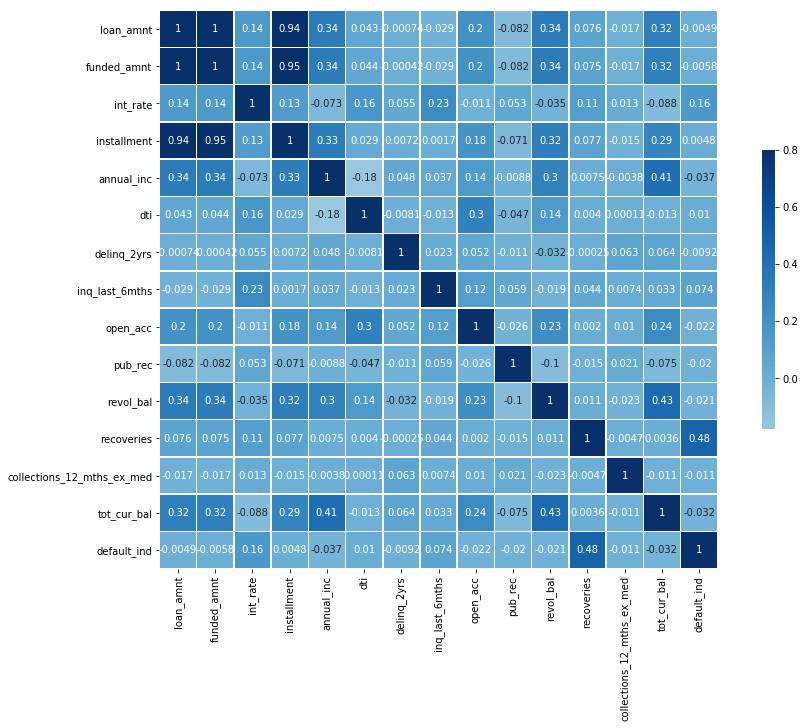

In [23]:
correlation_matrix = df_copy.corr()
a4_dimens = (15.7 , 10.27)
fig , ax = plt.subplots(figsize = a4_dimens)
sns.heatmap(correlation_matrix, cmap="Blues", vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} , 
            annot=True,
            xticklabels=correlation_matrix.columns.values ,
            yticklabels=correlation_matrix.columns.values,
            )

plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

<h4>From the below plot we infer that "loan_amnt","funded_amnt"and"installment" are highly correlated to each other and can lead the model to perform poor. So in this case we can remove funded_amnt and installment , both are derieved from loan_amnt . </h4>

In [24]:
del df_copy["installment" ]
del df_copy["funded_amnt"]

In [25]:
df_copy.shape

(855969, 21)

In [26]:
df_copy.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,recoveries,collections_12_mths_ex_med,tot_cur_bal,default_ind
count,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,8.559690e+05,855969.000000
mean,14745.571335,13.192320,7.512665e+04,18.092736,0.311621,0.680915,11.542447,0.194537,1.691053e+04,47.089499,0.014230,1.397662e+05,0.054286
std,8425.340005,4.368365,6.431335e+04,8.285908,0.857189,0.964033,5.308094,0.581585,2.222374e+04,413.136043,0.133707,1.477618e+05,0.226581
min,500.000000,5.320000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,8000.000000,9.990000,4.500000e+04,11.880000,0.000000,0.000000,8.000000,0.000000,6.469000e+03,0.000000,0.000000,3.225000e+04,0.000000
50%,13000.000000,12.990000,6.500000e+04,17.610000,0.000000,0.000000,11.000000,0.000000,1.190300e+04,0.000000,0.000000,1.005610e+05,0.000000
75%,20000.000000,15.990000,9.000000e+04,23.890000,0.000000,1.000000,14.000000,0.000000,2.085700e+04,0.000000,0.000000,1.963730e+05,0.000000
max,35000.000000,28.990000,9.500000e+06,60.403669,39.000000,8.000000,90.000000,86.000000,2.904836e+06,33520.270000,20.000000,8.000078e+06,1.000000


In [28]:
def biased_IF(data):
    for x in data:
        val = data[x].unique()[0]
        s = data[x][data[x] == val].size
        p = (s/data.shape[0])*100
        
        if p >= 50 and (data[x].dtype == "int" or data[x].dtype == "float64") :
            
            print(x)
            print("value : ",val,"appearance : ",s , " : percent : ",p , "\n")
            
biased_IF(df_copy)

delinq_2yrs
value :  0.0 appearance :  692685  : percent :  80.9240755214266 

pub_rec
value :  0.0 appearance :  725455  : percent :  84.75248519514142 

recoveries
value :  0.0 appearance :  831782  : percent :  97.17431355574793 

collections_12_mths_ex_med
value :  0.0 appearance :  844768  : percent :  98.69142457261887 



<h4>From the above output we see that varibles recoveries  and collection_12_mths_ex_med have more than 90% biased values . This lead the model to perform poor . in this case we can remove these 2 variables .</h4>
<h4>But we can still use pub_rec and delinq_2yrs , we can convert these variables into categorical data .</h4>

In [29]:
df_copy = df_copy.drop(['recoveries','collections_12_mths_ex_med'],axis=1) 
df_copy.shape

(855969, 19)

In [30]:
df_copy["delinq_2yrs"] = df_copy["delinq_2yrs"].astype(int)
df_copy["delinq_2yrs"][df_copy["delinq_2yrs"] > 0 ] = 1
df_copy["delinq_2yrs"].unique()

array([0, 1], dtype=int64)

In [31]:
df_copy["pub_rec"] = df_copy["pub_rec"].astype(int)
df_copy["pub_rec"][df_copy["pub_rec"] > 0 ] = 1
df_copy["pub_rec"].unique()

array([0, 1], dtype=int64)

<h3>Binning</h3>

In [32]:
print("min : " ,min(df_copy["annual_inc"]) ,"max : ", max(df_copy["annual_inc"]))
print("mode : " ,df_copy["annual_inc"].mode()[0])
print("mean : ",np.mean(df_copy["annual_inc"]) ,"median : ",np.median(df["annual_inc"]))
print("quantile 0.25 : ", df_copy["annual_inc"].quantile(0.25) ," quantile 0.50 : ", df_copy["annual_inc"].quantile(0.50) , 
     " quantile 0.75 : ", df_copy["annual_inc"].quantile(0.75) ," quantile 0.95 : ", df_copy["annual_inc"].quantile(0.95))

min :  3000.0 max :  9500000.0
mode :  60000.0
mean :  75126.65079432826 median :  65000.0
quantile 0.25 :  45000.0  quantile 0.50 :  65000.0  quantile 0.75 :  90000.0  quantile 0.95 :  150000.0


In [33]:
cat_an = pd.cut(df_copy["annual_inc"] , bins = [0,30000,50000,60000,90000,150000,9600000] , 
                labels = [6 , 5 , 4 , 3 , 2 , 1])
print(cat_an.value_counts())

3    250347
5    218384
2    163800
4    119893
6     61519
1     42026
Name: annual_inc, dtype: int64


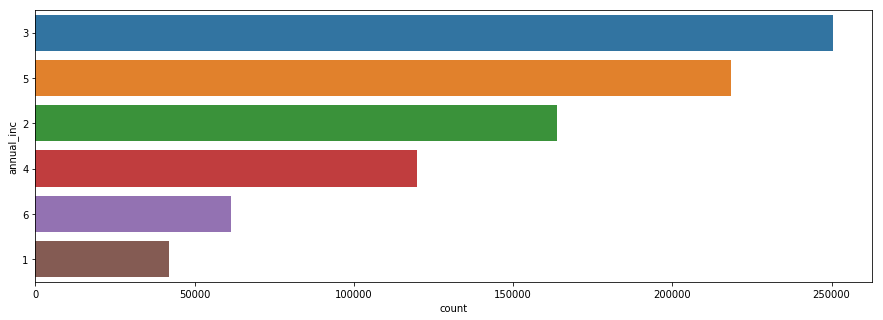

In [34]:
c = Counter(cat_an)
labels = []
for i in np.arange(0 , 6):
        labels.append(c.most_common()[i][0])

sns.countplot(y = cat_an , order=labels )
plt.show()

In [35]:
df_copy["annual_inc"] = cat_an
df_copy["annual_inc"] = df_copy["annual_inc"].astype(int)
print(df_copy["annual_inc"].head())

0    6
1    6
2    6
3    5
4    3
Name: annual_inc, dtype: int32


In [36]:
print("min : ",min(df_copy["revol_bal"]) ,"max : ", max(df_copy["revol_bal"]))
print("mode : ",df_copy["revol_bal"].mode()[0])
print("mean : ",np.mean(df_copy["revol_bal"]) ,"median : ",np.median(df["revol_bal"]))
print("quantile 0.25 : ",df_copy["revol_bal"].quantile(0.25) ," quantile 0.50 : ", df_copy["revol_bal"].quantile(0.50) , 
      " quantile 0.75 : ",df_copy["revol_bal"].quantile(0.75) ," quantile 0.95 : ", df_copy["revol_bal"].quantile(0.95))

min :  0.0 max :  2904836.0
mode :  0.0
mean :  16910.52699221584 median :  11903.0
quantile 0.25 :  6469.0  quantile 0.50 :  11903.0  quantile 0.75 :  20857.0  quantile 0.95 :  43833.0


In [37]:
cat_revol = pd.cut(df_copy["revol_bal"] , bins = [-1,5000,10000,20000,40000,3000000 ] , 
                   labels = [1,2,3,4,5])
print(cat_revol.value_counts())

3    268292
2    210104
4    173618
1    149285
5     54670
Name: revol_bal, dtype: int64


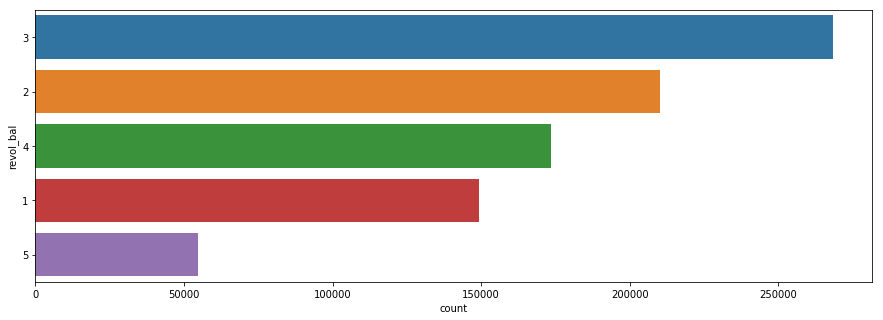

In [38]:
c_revol = Counter(cat_revol)
labels_revol = []
for i in np.arange(0 , 5):
        labels_revol.append(c_revol.most_common()[i][0])
sns.countplot(y = cat_revol , order=labels_revol)
plt.show()

In [39]:
df_copy["revol_bal"] = cat_revol
df_copy["revol_bal"] = df_copy["revol_bal"].astype(int)
print(df_copy["revol_bal"].head())

0    3
1    1
2    1
3    2
4    4
Name: revol_bal, dtype: int32


In [40]:
print("min : ",min(df_copy["tot_cur_bal"]) ,"max : ", max(df_copy["tot_cur_bal"]))
print("mode : ",df_copy["tot_cur_bal"].mode()[0])
print("mean : ",np.mean(df_copy["tot_cur_bal"]) ,"median : ", np.median(df_copy["tot_cur_bal"]))
print("quantile 0.25 : ",df_copy["tot_cur_bal"].quantile(0.25) ," quantile 0.50 : ", df_copy["tot_cur_bal"].quantile(0.50) , 
      " quantile 0.75 : ",df_copy["tot_cur_bal"].quantile(0.75) ," quantile 0.95 : ", df_copy["tot_cur_bal"].quantile(0.95))

min :  0.0 max :  8000078.0
mode :  139766.247529
mean :  139766.24752868796 median :  100561.0
quantile 0.25 :  32250.0  quantile 0.50 :  100561.0  quantile 0.75 :  196373.0  quantile 0.95 :  414677.59999999986


In [41]:
cat_tot_cur = pd.cut(df_copy["tot_cur_bal"] , 
                     bins = [-1,10000,30000,60000,120000,200000,400000,9000000],
                     labels = [7,6,5,4,3,2,1])
print(cat_tot_cur.value_counts())

3    189645
2    160934
6    152920
5    146685
4    112599
1     47986
7     45200
Name: tot_cur_bal, dtype: int64


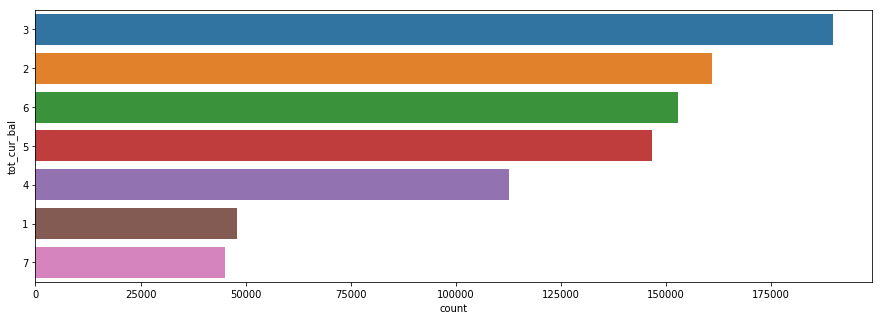

In [42]:
c_tot = Counter(cat_tot_cur)
labels_tot = []
for i in np.arange(0 , 7):
        labels_tot.append(c_tot.most_common()[i][0])
sns.countplot(y = cat_tot_cur , order=labels_tot)
plt.show()

In [43]:
df_copy["tot_cur_bal"] = cat_tot_cur
df_copy["tot_cur_bal"] = df_copy["tot_cur_bal"].astype(int)
print(df_copy["tot_cur_bal"].head())

0    3
1    3
2    3
3    3
4    3
Name: tot_cur_bal, dtype: int32


In [44]:
df_copy.dtypes

loan_amnt              float64
term                    object
int_rate               float64
grade                   object
emp_length              object
home_ownership          object
annual_inc               int32
verification_status     object
issue_d                 object
purpose                 object
dti                    float64
delinq_2yrs              int32
inq_last_6mths         float64
open_acc               float64
pub_rec                  int32
revol_bal                int32
initial_list_status     object
tot_cur_bal              int32
default_ind              int64
dtype: object

<h3>Outliers Treatment</h3>

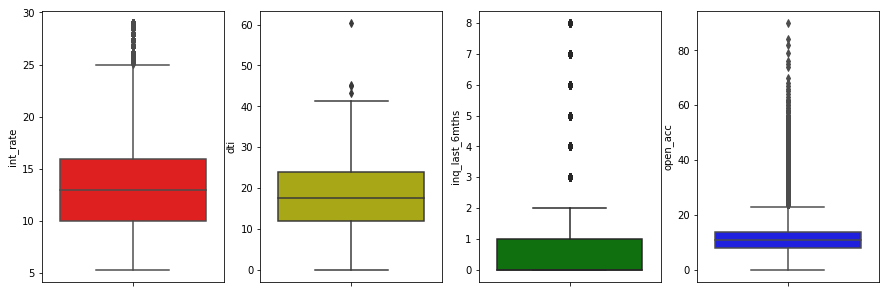

In [45]:
plt.figure(1)
plt.subplot(141)
sns.boxplot(df_copy["int_rate"] , orient="v" , color="r")

plt.figure(1)
plt.subplot(142)
sns.boxplot(df_copy["dti"] , orient="v" , color="y")

plt.figure(1)
plt.subplot(143)
sns.boxplot(df_copy["inq_last_6mths"] , orient="v" , color="g")

plt.figure(1)
plt.subplot(144)
sns.boxplot(df_copy["open_acc"] , orient="v" , color="b")

plt.show()

<h4>We will replace the outliers with upper whishker.</h4>

In [46]:
outlier_var_list = ["int_rate" , "dti" , "inq_last_6mths" , "open_acc"]
for var in outlier_var_list:
    B= plt.boxplot(df_copy[var])
    value = [item.get_ydata()[1] for item in B['whiskers']]
    upper_whisker = value[1]
    df_copy[var][df_copy[var] > upper_whisker] = upper_whisker

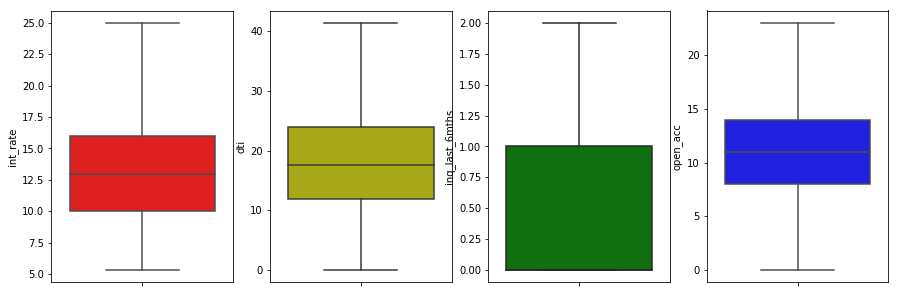

In [47]:
plt.figure(1)
plt.subplot(141)
sns.boxplot(df_copy["int_rate"] , orient="v" , color="r")

plt.figure(1)
plt.subplot(142)
sns.boxplot(df_copy["dti"] , orient="v" , color="y")

plt.figure(1)
plt.subplot(143)
sns.boxplot(df_copy["inq_last_6mths"] , orient="v" , color="g")

plt.figure(1)
plt.subplot(144)
sns.boxplot(df_copy["open_acc"] , orient="v" , color="b")

plt.show()

<h3>Label encoding.</h3>

In [48]:
df_copy["emp_length"][df_copy["emp_length"] == "n/a"] = 0
df_copy["emp_length"][df_copy["emp_length"] == "< 1 year"] = 1
df_copy["emp_length"][df_copy["emp_length"] == "1 year"] = 2
df_copy["emp_length"][df_copy["emp_length"] == "2 years"] = 3
df_copy["emp_length"][df_copy["emp_length"] == "3 years"] = 4
df_copy["emp_length"][df_copy["emp_length"] == "4 years"] = 5
df_copy["emp_length"][df_copy["emp_length"] == "5 years"] = 6
df_copy["emp_length"][df_copy["emp_length"] == "6 years"] = 7
df_copy["emp_length"][df_copy["emp_length"] == "7 years"] = 8
df_copy["emp_length"][df_copy["emp_length"] == "8 years"] = 9
df_copy["emp_length"][df_copy["emp_length"] == "9 years"] = 10
df_copy["emp_length"][df_copy["emp_length"] == "10+ years"] = 11

In [49]:
df_copy["emp_length"] = df_copy["emp_length"].astype(int)
print(df_copy["emp_length"].head())
print(df_copy["emp_length"].unique())

0    11
1     1
2    11
3    11
4     2
Name: emp_length, dtype: int32
[11  1  2  4  9 10  5  6  7  3  8  0]


In [50]:
for_label_encode = ["term","grade","home_ownership",
                    "verification_status","purpose","initial_list_status"]
from sklearn import preprocessing
le = {}
for x in for_label_encode:
    le[x] = preprocessing.LabelEncoder()
for x in for_label_encode:
    df_copy[x] = le[x].fit_transform(df_copy.__getattr__(x))
df_copy.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,initial_list_status,tot_cur_bal,default_ind
0,5000.0,0,10.65,1,11,5,6,2,Dec-2011,1,27.65,0,1.0,3.0,0,3,0,3,0
1,2500.0,1,15.27,2,1,5,6,1,Dec-2011,0,1.00,0,2.0,3.0,0,1,0,3,1
2,2400.0,0,15.96,2,11,5,6,0,Dec-2011,11,8.72,0,2.0,2.0,0,1,0,3,0
3,10000.0,0,13.49,2,11,5,5,1,Dec-2011,9,20.00,0,1.0,10.0,0,2,0,3,0
4,3000.0,1,12.69,1,2,5,3,1,Dec-2011,9,17.94,0,0.0,15.0,0,4,0,3,0


In [51]:
for x in for_label_encode:
    print(x,": ")
    print(df[x].unique())
    print(df_copy[x].unique())

term : 
[' 36 months' ' 60 months']
[0 1]
grade : 
['B' 'C' 'A' 'E' 'F' 'D' 'G']
[1 2 0 4 5 3 6]
home_ownership : 
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
[5 4 1 3 2 0]
verification_status : 
['Verified' 'Source Verified' 'Not Verified']
[2 1 0]
purpose : 
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
[ 1  0 11  9 13  2  4  6  7  8 12  5 10  3]
initial_list_status : 
['f' 'w']
[0 1]


<h3>Now lets split the data into train and test according to date's.</h3>
<h5>"The data should be divided into train ( June 2007 - May 2015 ) and out-of-time test ( June 2015 - Dec 2015 ) data."</h5>

In [52]:
issue_dates = []
for year in np.arange(2007,2016) :
    for month in np.arange(1 , 13):
        d = datetime.date(year , month , 1)
        m = str(d.strftime("%b"))
        sep = "-"
        y = str(d.year)
        full = m + sep + y
        issue_dates.append(full)
print(issue_dates[:101])

['Jan-2007', 'Feb-2007', 'Mar-2007', 'Apr-2007', 'May-2007', 'Jun-2007', 'Jul-2007', 'Aug-2007', 'Sep-2007', 'Oct-2007', 'Nov-2007', 'Dec-2007', 'Jan-2008', 'Feb-2008', 'Mar-2008', 'Apr-2008', 'May-2008', 'Jun-2008', 'Jul-2008', 'Aug-2008', 'Sep-2008', 'Oct-2008', 'Nov-2008', 'Dec-2008', 'Jan-2009', 'Feb-2009', 'Mar-2009', 'Apr-2009', 'May-2009', 'Jun-2009', 'Jul-2009', 'Aug-2009', 'Sep-2009', 'Oct-2009', 'Nov-2009', 'Dec-2009', 'Jan-2010', 'Feb-2010', 'Mar-2010', 'Apr-2010', 'May-2010', 'Jun-2010', 'Jul-2010', 'Aug-2010', 'Sep-2010', 'Oct-2010', 'Nov-2010', 'Dec-2010', 'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011', 'May-2011', 'Jun-2011', 'Jul-2011', 'Aug-2011', 'Sep-2011', 'Oct-2011', 'Nov-2011', 'Dec-2011', 'Jan-2012', 'Feb-2012', 'Mar-2012', 'Apr-2012', 'May-2012', 'Jun-2012', 'Jul-2012', 'Aug-2012', 'Sep-2012', 'Oct-2012', 'Nov-2012', 'Dec-2012', 'Jan-2013', 'Feb-2013', 'Mar-2013', 'Apr-2013', 'May-2013', 'Jun-2013', 'Jul-2013', 'Aug-2013', 'Sep-2013', 'Oct-2013', 'Nov-2013', 'De

In [53]:
data_split_type = []
for date in df_copy["issue_d"].values:
    if date in issue_dates[:101]:
        data_split_type.append("train")
    else:
        data_split_type.append("test")
df_copy["type"] =  data_split_type

In [54]:
df_till_may2015 = pd.DataFrame(df_copy[df_copy["type"] == "train"])
df_test = pd.DataFrame(df_copy[df_copy["type"] == "test"])

In [55]:
del df_till_may2015["type"]
del df_till_may2015["issue_d"]

del df_test["type"]
del df_test["issue_d"]

In [56]:
print(df_till_may2015.shape)
print(df_test.shape)

(598978, 18)
(256991, 18)


<h3>Modeling.</h3>
<h4>As we know that the dependent variable has imbalanced classes or skewed class , so we will take different approaches for modeling like :- </h4>
<h4>1) Adding penalty to the loss function or cost function.</h4>
<h4>2) Up sampling</h4>
<h4>3) Down sampling </h4>
<h4>4) Up sampling and down sampling</h4>

<h2>Logistic Regression</h2>

In [57]:
x = df_till_may2015.iloc[ : , :-1].values
y = df_till_may2015.iloc[ : , -1 ].values
print(x)
print(y)

[[  5.00000000e+03   0.00000000e+00   1.06500000e+01 ...,   3.00000000e+00
    0.00000000e+00   3.00000000e+00]
 [  2.50000000e+03   1.00000000e+00   1.52700000e+01 ...,   1.00000000e+00
    0.00000000e+00   3.00000000e+00]
 [  2.40000000e+03   0.00000000e+00   1.59600000e+01 ...,   1.00000000e+00
    0.00000000e+00   3.00000000e+00]
 ..., 
 [  1.30000000e+04   1.00000000e+00   1.59900000e+01 ...,   3.00000000e+00
    1.00000000e+00   5.00000000e+00]
 [  1.20000000e+04   1.00000000e+00   1.99900000e+01 ...,   2.00000000e+00
    1.00000000e+00   5.00000000e+00]
 [  2.00000000e+04   0.00000000e+00   1.19900000e+01 ...,   4.00000000e+00
    0.00000000e+00   5.00000000e+00]]
[0 1 0 ..., 0 0 0]


In [103]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x)
x = scalar.transform(x)

In [104]:
from sklearn.model_selection import train_test_split as split
x_train , x_test , y_train , y_test = split(x , y ,
                                            test_size = 0.3 , 
                                            random_state = 123)

<b>First we will check the classification using Logistic regression without tunning the parameters</b>

In [107]:
algo = (LogisticRegression())
algo.fit(x_train , y_train)

pred_y_cv = algo.predict(x_train)

print("On train : ")
print("confusion matrix")
print(confusion_matrix(y_train , pred_y_cv))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_cv))
print(accuracy_score(y_train , pred_y_cv))

pred_y = algo.predict(x_test)
print("\n On test : ")
print("confusion matrix")
print(confusion_matrix(y_test , pred_y))
print("\n \nreport\n")
print(classification_report(y_test , pred_y))
print(accuracy_score(y_test , pred_y))

On train : 
confusion matrix
[[387007      2]
 [ 32275      0]]

 
report

             precision    recall  f1-score   support

          0       0.92      1.00      0.96    387009
          1       0.00      0.00      0.00     32275

avg / total       0.85      0.92      0.89    419284

0.923018765324

 On test : 
confusion matrix
[[165813      0]
 [ 13881      0]]

 
report

             precision    recall  f1-score   support

          0       0.92      1.00      0.96    165813
          1       0.00      0.00      0.00     13881

avg / total       0.85      0.92      0.89    179694

0.922752011753


<b>From above output we see that the model is not predicting 1("defaulters")</b><br>
<b>Now lets tune the parameters .</b>

In [108]:
algo = (LogisticRegression(class_weight= "balanced" ,  solver= "sag" , max_iter = 500 , tol= 0.0001))
algo.fit(x_train , y_train)

pred_y_cv = algo.predict(x_train)

print("On train : ")
print("confusion matrix")
print(confusion_matrix(y_train , pred_y_cv))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_cv))
print(accuracy_score(y_train , pred_y_cv))

pred_y = algo.predict(x_test)
print("\n On test : ")
print("confusion matrix")
print(confusion_matrix(y_test , pred_y))
print("\n \nreport\n")
print(classification_report(y_test , pred_y))
print(accuracy_score(y_test , pred_y))

On train : 
confusion matrix
[[250540 136469]
 [ 11047  21228]]

 
report

             precision    recall  f1-score   support

          0       0.96      0.65      0.77    387009
          1       0.13      0.66      0.22     32275

avg / total       0.89      0.65      0.73    419284

0.648171644995

 On test : 
confusion matrix
[[107121  58692]
 [  4739   9142]]

 
report

             precision    recall  f1-score   support

          0       0.96      0.65      0.77    165813
          1       0.13      0.66      0.22     13881

avg / total       0.89      0.65      0.73    179694

0.647005464846


<b>Now he we got better results then before , even though the accuracy is decreasing but model predicted 1("defaulters")</b><br>
<b>And even the precision and recall rate has increased for 1("defaulters")</b><br>
<b>Now as we can see this model is working fine lets change the threshold and see the results </b>

In [109]:
pred_y_thres = algo.predict_proba(x_train)

pred_y_thres_50_99 = []
for i in pd.DataFrame(pred_y_thres)[1]:
    if i >= 0.5099:
        pred_y_thres_50_99.append(1)
    else :
        pred_y_thres_50_99.append(0)

print("confusion matrix")
print(confusion_matrix(y_train , pred_y_thres_50_99))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_thres_50_99))
print(accuracy_score(y_train , pred_y_thres_50_99))

confusion matrix
[[257353 129656]
 [ 11626  20649]]

 
report

             precision    recall  f1-score   support

          0       0.96      0.66      0.78    387009
          1       0.14      0.64      0.23     32275

avg / total       0.89      0.66      0.74    419284

0.663039848885


<b>So we got 2 percent increase in our accuracy .</b><br>
<b>As we can see the accuracy on train is less than 70 which is underfiting lets try by adding penalty to the cost function or loss function and then check acccuracy respectively and the classification report</b><br>
<br>
<b>So now we will have to bare implementation of logistic and then add penalty to it.</b>

In [72]:
def costFunction(x,y,theta):
    z = x @ (-(theta.T))
    euler = np.power(math.e , z)
    pred_y = 1/(1 + euler)
    
    costF = ( (-y*((np.log(pred_y)) ) ) - (1-y)* (np.log(1-pred_y)) )
    
    return sum(costF)/len(x)
    
def gradientDescent(x , y , theta , alpha , iterations , convergence_threshold = None):
    cost = np.zeros(iterations)
    for i in range(iterations):
        
        z = x @ (-(theta.T))
        eulers = np.power(math.e , z)
        pred_y = 1/(1+eulers)
        
        penaltied_cost = []
        for p_y , a_y in zip(pred_y,y):
            if a_y == 1:
                penaltied_cost.append( float(5.5*(p_y - a_y)) )
            else:
                penaltied_cost.append( float((p_y - a_y)) )
        penaltied_cost = np.array([penaltied_cost])
        penaltied_cost = penaltied_cost.reshape(penaltied_cost.shape[1] , 1)
        partialDerivativeoftheta = (1/len(x))* (sum((penaltied_cost)*x))
        
        theta = theta - (alpha*partialDerivativeoftheta)
        cost[i] = costFunction(x,y,theta)
        
        
        if not convergence_threshold == None and cost[i] < convergence_threshold:
            break 
    return theta , cost

def logistic_regression( x , theta):
	z  = x @ (-theta.T)
	eulers = np.power(math.e , z)
	pred_y = 1 / (1 + eulers)

	classified = []
	for i in pred_y:
		if i >= 0.5099:
			classified.append(1)
		else:
			classified.append(0)

	return pred_y , classified

In [73]:
alpha = 0.01
iterations = 80

In [74]:
x = df_till_may2015.iloc[ : , :-1].values
y = df_till_may2015.iloc[ : , -1 ].values

x0 = np.ones([x.shape[0],1])
x = np.concatenate((x0,x) , axis = 1)
y = y.reshape(y.shape[0],1)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x)
x = scalar.transform(x)

theta = np.zeros([1,x.shape[1]])


In [75]:
from sklearn.model_selection import train_test_split as split
x_train , x_test , y_train , y_test = split(x , y ,
                                            test_size = 0.3 , 
                                            random_state = 123)

In [76]:
coef , new_cost = gradientDescent(x_train , y_train , theta , alpha , iterations)
print(coef)

[[ 0.          0.00045456  0.01955261  0.0849821   0.07120911 -0.01002833
   0.02047814  0.03502873  0.02219905  0.02376734  0.01461788 -0.00559123
   0.03820659 -0.00812205 -0.01180911 -0.0075616  -0.04153035  0.00509982]]


In [178]:
pred_y_cv , classified_cv = logistic_regression(x_train , coef)
print("On train : ")
print("confusion matrix")
print(confusion_matrix(y_train , classified_cv))
print("\n \nreport\n")
print(classification_report(y_train , classified_cv))
print(accuracy_score(y_train , classified_cv))

pred_y , classified = logistic_regression(x_test , coef)
print("\n On test : ")
print("confusion matrix")
print(confusion_matrix(y_test , classified))
print("\n \nreport\n")
print(classification_report(y_test , classified))
print(accuracy_score(y_test , classified))

On train : 
confusion matrix
[[237930 149079]
 [ 10959  21316]]

 
report

             precision    recall  f1-score   support

          0       0.96      0.61      0.75    387009
          1       0.13      0.66      0.21     32275

avg / total       0.89      0.62      0.71    419284

0.618306446227

 On test : 
confusion matrix
[[101723  64090]
 [  4715   9166]]

 
report

             precision    recall  f1-score   support

          0       0.96      0.61      0.75    165813
          1       0.13      0.66      0.21     13881

avg / total       0.89      0.62      0.71    179694

0.617099068416


<b>Now lets try with up sampling and down sampling.</b>

In [145]:
from sklearn.utils import resample

df_majority = df_till_may2015[df_till_may2015.default_ind==0]
df_minority = df_till_may2015[df_till_may2015.default_ind==1]

df_minority_upsampled = resample(df_minority, 
                                replace=True,     
                                 n_samples=200000,    
                                random_state=123) 

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=350000,
                                 random_state=123)
 

df_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])
 
df_sampled.default_ind.value_counts()


0    350000
1    200000
Name: default_ind, dtype: int64

In [146]:
x = df_sampled.iloc[ : , :-1].values
y = df_sampled.iloc[ : , -1 ].values


from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x)
x = scalar.transform(x)

from sklearn.model_selection import train_test_split as split
x_train , x_test , y_train , y_test = split(x , y ,
                                            test_size = 0.3 , 
                                            random_state = 123)

In [147]:
algo = (LogisticRegression(solver= "sag" , max_iter = 1500 , tol= 0.00001))
algo.fit(x_train , y_train)

pred_y_cv = algo.predict(x_train)

print("On train : ")
print("confusion matrix")
print(confusion_matrix(y_train , pred_y_cv))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_cv))
print(accuracy_score(y_train , pred_y_cv))

pred_y = algo.predict(x_test)
print("\n On test : ")
print("confusion matrix")
print(confusion_matrix(y_test , pred_y))
print("\n \nreport\n")
print(classification_report(y_test , pred_y))
print(accuracy_score(y_test , pred_y))

On train : 
confusion matrix
[[209248  35804]
 [ 88052  51896]]

 
report

             precision    recall  f1-score   support

          0       0.70      0.85      0.77    245052
          1       0.59      0.37      0.46    139948

avg / total       0.66      0.68      0.66    385000

0.678296103896

 On test : 
confusion matrix
[[89648 15300]
 [37796 22256]]

 
report

             precision    recall  f1-score   support

          0       0.70      0.85      0.77    104948
          1       0.59      0.37      0.46     60052

avg / total       0.66      0.68      0.66    165000

0.678206060606


In [156]:
pred_y_thres = algo.predict_proba(x_train)

pred_y_thres_50_99 = []
for i in pd.DataFrame(pred_y_thres)[1]:
    if i >= 0.5099:
        pred_y_thres_50_99.append(1)
    else :
        pred_y_thres_50_99.append(0)

print("confusion matrix")
print(confusion_matrix(y_train , pred_y_thres_50_99))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_thres_50_99))
print(accuracy_score(y_train , pred_y_thres_50_99))

confusion matrix
[[211747  33305]
 [ 90947  49001]]

 
report

             precision    recall  f1-score   support

          0       0.70      0.86      0.77    245052
          1       0.60      0.35      0.44    139948

avg / total       0.66      0.68      0.65    385000

0.677267532468


<b>As we can see the type two error is increasing , lets try Up sampling </b><br>


In [157]:
df_majority = df_till_may2015[df_till_may2015.default_ind==0]
df_minority = df_till_may2015[df_till_may2015.default_ind==1]

df_minority_upsampled = resample(df_minority, 
                                replace=True,     
                                 n_samples=500000,    
                                random_state=123) 

df_majority_downsampled = resample(df_majority, 
                                 replace=True,    
                                 n_samples=950000,
                                 random_state=123)
 

df_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])
 
df_sampled.default_ind.value_counts()

0    950000
1    500000
Name: default_ind, dtype: int64

In [158]:
x = df_sampled.iloc[ : , :-1].values
y = df_sampled.iloc[ : , -1 ].values


from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x)
x = scalar.transform(x)

from sklearn.model_selection import train_test_split as split
x_train , x_test , y_train , y_test = split(x , y ,
                                            test_size = 0.3 , 
                                            random_state = 123)

In [160]:
algo = (LogisticRegression(class_weight="balanced" , solver= "sag" , max_iter = 1500 , tol= 0.00001))
algo.fit(x_train , y_train)

pred_y_cv = algo.predict(x_train)

print("On train : ")
print("confusion matrix")
print(confusion_matrix(y_train , pred_y_cv))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_cv))
print(accuracy_score(y_train , pred_y_cv))

pred_y = algo.predict(x_test)
print("\n On test : ")
print("confusion matrix")
print(confusion_matrix(y_test , pred_y))
print("\n \nreport\n")
print(classification_report(y_test , pred_y))
print(accuracy_score(y_test , pred_y))

On train : 
confusion matrix
[[430399 235143]
 [119442 230016]]

 
report

             precision    recall  f1-score   support

          0       0.78      0.65      0.71    665542
          1       0.49      0.66      0.56    349458

avg / total       0.68      0.65      0.66   1015000

0.650655172414

 On test : 
confusion matrix
[[183818 100640]
 [ 51618  98924]]

 
report

             precision    recall  f1-score   support

          0       0.78      0.65      0.71    284458
          1       0.50      0.66      0.57    150542

avg / total       0.68      0.65      0.66    435000

0.649981609195


In [161]:
pred_y_thres = algo.predict_proba(x_train)

pred_y_thres_50_99 = []
for i in pd.DataFrame(pred_y_thres)[1]:
    if i >= 0.5099:
        pred_y_thres_50_99.append(1)
    else :
        pred_y_thres_50_99.append(0)

print("confusion matrix")
print(confusion_matrix(y_train , pred_y_thres_50_99))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_thres_50_99))
print(accuracy_score(y_train , pred_y_thres_50_99))

confusion matrix
[[442079 223463]
 [125981 223477]]

 
report

             precision    recall  f1-score   support

          0       0.78      0.66      0.72    665542
          1       0.50      0.64      0.56    349458

avg / total       0.68      0.66      0.66   1015000

0.655720197044


<b>As we infer from all the outputs of logistic Regression that , logistic regression is not performing well .</b><br>
<b>Now lets try ensemble models Random Forest and Xgboost </b>

In [162]:
x = df_till_may2015.iloc[ : , :-1].values
y = df_till_may2015.iloc[ : , -1 ].values

scalar = StandardScaler()
scalar.fit(x)
x = scalar.transform(x)

from sklearn.model_selection import train_test_split as split
x_train , x_test , y_train , y_test = split(x , y ,
                                            test_size = 0.3 , 
                                            random_state = 123)

In [163]:
algo = (RandomForestClassifier())
algo.fit(x_train , y_train)

pred_y_cv = algo.predict(x_train)
print("On train : ")
print("confusion matrix")
print(confusion_matrix(y_train , pred_y_cv))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_cv))
print(accuracy_score(y_train , pred_y_cv))

pred_y = algo.predict(x_test)
print("\n On test : ")
print("confusion matrix")
print(confusion_matrix(y_test , pred_y))
print("\n \nreport\n")
print(classification_report(y_test , pred_y))
print(accuracy_score(y_test , pred_y))

On train : 
confusion matrix
[[387005      4]
 [  5910  26365]]

 
report

             precision    recall  f1-score   support

          0       0.98      1.00      0.99    387009
          1       1.00      0.82      0.90     32275

avg / total       0.99      0.99      0.99    419284

0.985895001956

 On test : 
confusion matrix
[[165434    379]
 [ 13739    142]]

 
report

             precision    recall  f1-score   support

          0       0.92      1.00      0.96    165813
          1       0.27      0.01      0.02     13881

avg / total       0.87      0.92      0.89    179694

0.921433102942


<b>As we can infer that it performed good on the data it was trained and performed poor on unknown data , this is a case of overfiting lets tune the parameters .</b>

In [164]:
algo = (RandomForestClassifier(n_estimators = 500 ))
algo.fit(x_train , y_train)

pred_y_cv = algo.predict(x_train)
print("On train : ")
print("confusion matrix")
print(confusion_matrix(y_train , pred_y_cv))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_cv))
print(accuracy_score(y_train , pred_y_cv))

pred_y = algo.predict(x_test)
print("\n On test : ")
print("confusion matrix")
print(confusion_matrix(y_test , pred_y))
print("\n \nreport\n")
print(classification_report(y_test , pred_y))
print(accuracy_score(y_test , pred_y))

On train : 
confusion matrix
[[387009      0]
 [     0  32275]]

 
report

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    387009
          1       1.00      1.00      1.00     32275

avg / total       1.00      1.00      1.00    419284

1.0

 On test : 
confusion matrix
[[165797     16]
 [ 13875      6]]

 
report

             precision    recall  f1-score   support

          0       0.92      1.00      0.96    165813
          1       0.27      0.00      0.00     13881

avg / total       0.87      0.92      0.89    179694

0.922696361592


<b>Again overfitting</b>

In [165]:
algo = (RandomForestClassifier(n_estimators = 500 , max_depth= 18))
algo.fit(x_train , y_train)

pred_y_cv = algo.predict(x_train)
print("On train : ")
print("confusion matrix")
print(confusion_matrix(y_train , pred_y_cv))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_cv))
print(accuracy_score(y_train , pred_y_cv))

pred_y = algo.predict(x_test)
print("\n On test : ")
print("confusion matrix")
print(confusion_matrix(y_test , pred_y))
print("\n \nreport\n")
print(classification_report(y_test , pred_y))
print(accuracy_score(y_test , pred_y))

On train : 
confusion matrix
[[387009      0]
 [ 28236   4039]]

 
report

             precision    recall  f1-score   support

          0       0.93      1.00      0.96    387009
          1       1.00      0.13      0.22     32275

avg / total       0.94      0.93      0.91    419284

0.93265662415

 On test : 
confusion matrix
[[165813      0]
 [ 13879      2]]

 
report

             precision    recall  f1-score   support

          0       0.92      1.00      0.96    165813
          1       1.00      0.00      0.00     13881

avg / total       0.93      0.92      0.89    179694

0.922763141785


<b>Lets try up sampling and down sampling</b>

In [59]:
from sklearn.utils import resample
df_majority = df_till_may2015[df_till_may2015.default_ind==0]
df_minority = df_till_may2015[df_till_may2015.default_ind==1]

df_minority_upsampled = resample(df_minority, 
                                replace=True,     
                                 n_samples=200000,    
                                random_state=123) 

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=350000,
                                 random_state=123)
 

df_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])
 
df_sampled.default_ind.value_counts()

0    350000
1    200000
Name: default_ind, dtype: int64

In [60]:
x = df_sampled.iloc[ : , :-1].values
y = df_sampled.iloc[ : , -1 ].values


from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x)
x = scalar.transform(x)

from sklearn.model_selection import train_test_split as split
x_train , x_test , y_train , y_test = split(x , y ,
                                            test_size = 0.3 , 
                                            random_state = 123)

In [61]:
algo = (RandomForestClassifier(n_estimators = 501 ))
algo.fit(x_train , y_train)

pred_y_cv = algo.predict(x_train)
print("On train : ")
print("confusion matrix")
print(confusion_matrix(y_train , pred_y_cv))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_cv))
print(accuracy_score(y_train , pred_y_cv))

pred_y = algo.predict(x_test)
print("\n On test : ")
print("confusion matrix")
print(confusion_matrix(y_test , pred_y))
print("\n \nreport\n")
print(classification_report(y_test , pred_y))
print(accuracy_score(y_test , pred_y))

On train : 
confusion matrix
[[245052      0]
 [     0 139948]]

 
report

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    245052
          1       1.00      1.00      1.00    139948

avg / total       1.00      1.00      1.00    385000

1.0

 On test : 
confusion matrix
[[102663   2285]
 [  2658  57394]]

 
report

             precision    recall  f1-score   support

          0       0.97      0.98      0.98    104948
          1       0.96      0.96      0.96     60052

avg / total       0.97      0.97      0.97    165000

0.970042424242


<b>As we can see we got an amazing result , precision and recall of both the class is proper . Now lets try with XgBoost and check whether we get better results than this.</b>

In [169]:
x = df_till_may2015.iloc[ : , :-1].values
y = df_till_may2015.iloc[ : , -1 ].values

scalar = StandardScaler()
scalar.fit(x)
x = scalar.transform(x)

from sklearn.model_selection import train_test_split as split
x_train , x_test , y_train , y_test = split(x , y ,
                                            test_size = 0.3 , 
                                            random_state = 123)

In [170]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_delta_step=2,
       max_depth=9, min_child_weight=5, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=12, seed=27,
       silent=True, subsample=0.8)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.5, learning_rate=0.01,
       max_delta_step=2, max_depth=9, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=12, seed=27, silent=True,
       subsample=0.8)

In [172]:
pred_y_cv = classifier.predict(x_train)

print("On train : ")
print("confusion matrix")
print(confusion_matrix(y_train , pred_y_cv))
print("\n \nreport\n")
print(classification_report(y_train , pred_y_cv))
print(accuracy_score(y_train , pred_y_cv))

pred_y = classifier.predict(x_test)
print("\n On test : ")
print("confusion matrix")
print(confusion_matrix(y_test , pred_y))
print("\n \nreport\n")
print(classification_report(y_test , pred_y))
print(accuracy_score(y_test , pred_y))

On train : 
confusion matrix
[[275564 111445]
 [  6203  26072]]

 
report

             precision    recall  f1-score   support

          0       0.98      0.71      0.82    387009
          1       0.19      0.81      0.31     32275

avg / total       0.92      0.72      0.78    419284

0.71940737066

 On test : 
confusion matrix
[[116025  49788]
 [  4748   9133]]

 
report

             precision    recall  f1-score   support

          0       0.96      0.70      0.81    165813
          1       0.16      0.66      0.25     13881

avg / total       0.90      0.70      0.77    179694

0.696506282903


<h3>So finally we infer that we are getting better results with Random Forest after down sampling majority class and up sampling minority class , with better score of precision and recall and 97% accuracy .</h3>

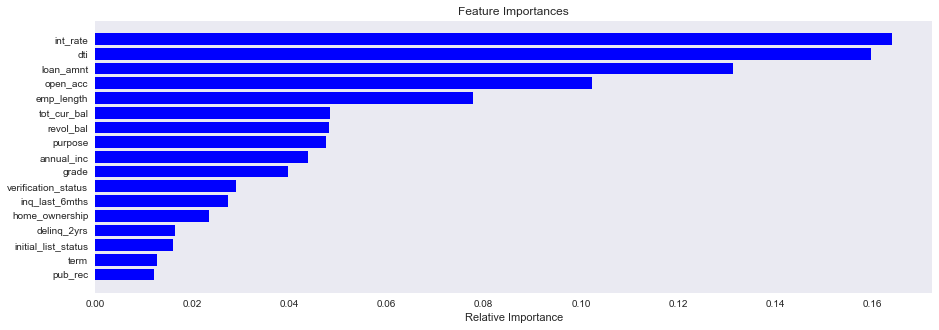

In [93]:
features = df_till_may2015.columns.values[:-1]
importances = algo.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h4>Now predicting using random forest on data from June 2015.</h4>

In [77]:
x = df_test.iloc[ : , :-1].values

scalar = StandardScaler()
scalar.fit(x)
x = scalar.transform(x)

y_pred = algo.predict(x)

In [66]:
data_split_type = []
for date in df["issue_d"].values:
    if date in issue_dates[:101]:
        data_split_type.append("train")
    else:
        data_split_type.append("test")
df["type"] =  data_split_type

df_submition = pd.DataFrame(df[df["type"] == "test"])

In [68]:
df_submition["default_ind"] = y_pred


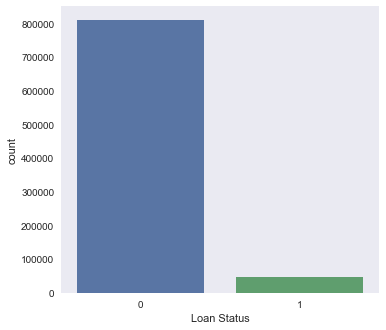

In [70]:
c = Counter(df_submition["default_ind"])
labels = []
size = df_submition["default_ind"].unique().size
for i in np.arange(0 , size):
    labels.append(c.most_common()[i][0])
a4_dimens = (5.7 , 5.27)
fig , ax = plt.subplots(figsize = a4_dimens)
sns.set(style = "dark")
sns.countplot(x = "default_ind" , data = df , order = labels , ax = ax )
plt.xlabel("Loan Status")
plt.show()

In [71]:
df_submition["default_ind"].value_counts()

0    253079
1      3912
Name: default_ind, dtype: int64

In [91]:
df_submition.to_csv("final_results.csv" , header = True)